# import the Libraries

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
data = pd.read_csv(r"C:\\Users\\pc\\Downloads\\project\\tmdb_movies_data.csv")
data

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
print(data.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [5]:
data.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [6]:
data.duplicated().sum()

1

In [7]:
print("number of duplicated data ",data.duplicated().sum(),"\n")
data=data.drop_duplicates()

number of duplicated data  1 



In [9]:
data['id'].unique()

array([135397,  76341, 262500, ...,  39768,  21449,  22293], dtype=int64)

In [10]:
for c  in data['id'].unique():
    print(c)

135397
76341
262500
140607
168259
281957
87101
286217
211672
150540
206647
76757
264660
257344
99861
273248
260346
102899
150689
131634
158852
307081
254128
216015
318846
177677
214756
207703
314365
294254
280996
198184
254470
296098
257445
264644
339527
105864
241554
167073
277216
274854
321697
203801
293863
325348
228161
286565
265208
254320
258480
257211
253412
274479
257088
295964
238615
210860
306819
201088
273481
166424
310131
238713
256591
249070
205775
334074
312221
271718
333352
276907
284289
266647
347096
308369
227973
321741
296100
263472
228205
159824
333348
285783
290764
296099
243688
287424
301875
181283
328425
274167
370687
307663
309809
258509
298382
272693
283445
256961
326359
254302
241251
292040
188222
252838
273477
298312
261023
336004
287903
182560
192141
308639
261392
304357
297291
266294
227719
86828
287948
201085
277355
264999
146301
223485
294016
290751
309245
228165
245706
272878
263109
157827
321751
266396
277685
268920
280092
193687
300803
328589
228066
3783

In [11]:
data['imdb_id'].unique()

array(['tt0369610', 'tt1392190', 'tt2908446', ..., 'tt0060161',
       'tt0061177', 'tt0060666'], dtype=object)

In [12]:
for c  in data['imdb_id'].unique():
    print(c)

tt0369610
tt1392190
tt2908446
tt2488496
tt2820852
tt1663202
tt1340138
tt3659388
tt2293640
tt2096673
tt2379713
tt1617661
tt0470752
tt2120120
tt2395427
tt3460252
tt2446042
tt0478970
tt1661199
tt1951266
tt1964418
tt1798684
tt2126355
tt2322441
tt1596363
tt2381249
tt2637276
tt2802144
tt1895587
tt4046784
tt3168230
tt1823672
tt2848292
tt3682448
tt1051904
tt3170832
tt1291570
tt1979388
tt2199571
tt2381111
tt1398426
tt1618442
tt2080374
tt1638355
tt1655441
tt3072482
tt2224026
tt3622592
tt2231253
tt3464902
tt2402927
tt2361509
tt2719848
tt2446980
tt2058673
tt2503944
tt2140379
tt3045616
tt0810819
tt2717822
tt3397884
tt1502712
tt4263482
tt3079380
tt2381941
tt2679042
tt1390411
tt3247714
tt3076658
tt3152624
tt2057392
tt3569230
tt2911668
tt3332064
tt3478232
tt2582496
tt2452042
tt3322364
tt3530002
tt3605418
tt2726560
tt2510894
tt2279339
tt3488710
tt2401097
tt1524930
tt1029360
tt1881002
tt3289728
tt1014763
tt4178092
tt1528854
tt3608646
tt3480796
tt1754656
tt2974918
tt2910904
tt1666801
tt2752772
tt3450650


In [13]:
data.dropna(subset=['imdb_id'], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_11820\2075492922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['imdb_id'], inplace=True)


In [14]:
data['popularity'].unique()

array([32.985763, 28.419936, 13.112507, ...,  0.065141,  0.064317,
        0.035919])

In [15]:
for c  in data['popularity'].unique():
    print(c)

32.985763
28.419936
13.112507
11.173104
9.335014
9.1107
8.654359
7.6674
7.404165
6.326804
6.200282
6.189369
6.118847
5.984995
5.944927
5.8984
5.749758
5.573184
5.556818
5.476958
5.462138
5.337064
4.907832
4.710402
4.648046
4.566713
4.564549
4.503789
4.062293
3.968891
3.927333
3.899557
3.877764
3.64821
3.644541
3.557846
3.358321
3.339135
3.23737
3.227329
3.202719
3.080505
3.079522
3.053421
3.025852
3.023253
2.976436
2.968254
2.93234
2.885126
2.883233
2.814802
2.798017
2.793297
2.614499
2.584264
2.578919
2.575711
2.557859
2.550747
2.487849
2.487042
2.46449
2.404473
2.395366
2.354654
2.345821
2.331636
2.331567
2.31767
2.29573
2.28135
2.272044
2.234573
2.165433
2.141506
2.140199
2.121884
2.096273
2.080935
2.070708
2.060162
2.055572
2.049886
2.026651
2.000338
1.984529
1.980039
1.959765
1.95632
1.926739
1.904898
1.876037
1.872696
1.865007
1.841779
1.82313
1.758618
1.742286
1.73518
1.724712
1.661789
1.651078
1.646664
1.532997
1.510096
1.499614
1.495112
1.483246
1.449072
1.448002
1.443406
1.41

In [16]:
data['budget'].unique()

array([150000000, 110000000, 200000000, 190000000, 135000000, 155000000,
       108000000,  74000000, 175000000, 245000000, 176000003,  15000000,
        88000000, 280000000,  44000000,  48000000, 130000000,  95000000,
       160000000,  30000000,  40000000,  28000000,  68000000,  81000000,
        20000000,  61000000,         0,  49000000,  29000000,  58000000,
         6000000,  50000000,  11000000,  90000000,  75000000,  25000000,
        10000000,  12000000,   4000000,  11800000,  35000000,  55000000,
        60000000, 105000000,  26000000,  70000000, 120000001,   3500000,
        65000000,  50100000, 100000000,  13000000,  99000000,   2500000,
        34000000,  80000000,  17000000,  31000000,   5000000,  64000000,
        11930000,   8500000,  23000000,  53000000,   8900000,    700000,
        14800000,  19500000,   1000000,   8000000,   1800000,   2000000,
        18000000,    630019,  14000000,  37000000,   7000000,   3000000,
         9600000,   2240000,   3300000,    100000, 

In [17]:
for c  in data['budget'].unique():
    print(c)

150000000
110000000
200000000
190000000
135000000
155000000
108000000
74000000
175000000
245000000
176000003
15000000
88000000
280000000
44000000
48000000
130000000
95000000
160000000
30000000
40000000
28000000
68000000
81000000
20000000
61000000
0
49000000
29000000
58000000
6000000
50000000
11000000
90000000
75000000
25000000
10000000
12000000
4000000
11800000
35000000
55000000
60000000
105000000
26000000
70000000
120000001
3500000
65000000
50100000
100000000
13000000
99000000
2500000
34000000
80000000
17000000
31000000
5000000
64000000
11930000
8500000
23000000
53000000
8900000
700000
14800000
19500000
1000000
8000000
1800000
2000000
18000000
630019
14000000
37000000
7000000
3000000
9600000
2240000
3300000
100000
21000000
5300000
9000000
447524
1950000
4400000
27000000
500000
600000
7500000
1500000
650000
9500000
3400000
1300000
1900000
13500000
10
165000000
170000000
125000000
250000000
127000000
85000000
210000000
42000000
178000000
58800000
140000000
180000000
145000000
132000000


In [18]:
data['revenue'].unique()

array([1513528810,  378436354,  295238201, ...,     321952,   78000000,
         33736689], dtype=int64)

In [19]:
for c  in data['revenue'].unique():
    print(c)

1513528810
378436354
295238201
2068178225
1506249360
532950503
440603537
595380321
1156730962
853708609
880674609
183987723
36869414
243637091
1405035767
155760117
325771424
518602163
542351353
650523427
209035668
91709827
470490832
569651467
133346506
682330139
215863606
403802136
88346473
311256926
29355203
102069268
287506194
162610473
150170815
35401758
22354572
331926147
71561644
62076141
201634991
140396650
34441873
108145109
42629776
14333790
368871007
85512300
0
9064511
40272135
194564672
203427584
101134059
133718711
36606743
30523226
30418560
64191523
17752940
84025816
167977596
40423945
235666219
153962963
82347656
93820758
137935567
140795793
32848185
42972994
45895
128388320
246233113
48623572
52395996
5214043
63013281
466183544
24000000
61181942
1863315
104384188
95437994
187112
2000000
3324330
58978653
240360392
97571250
233755553
18340000
43528634
52882018
107597242
50163103
49263404
79799880
14860766
98450062
99775678
50136
61548707
208588
54418872
17986781
28208085
61

In [20]:
data['original_title'].unique()


array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent', ...,
       'Beregis Avtomobilya', "What's Up, Tiger Lily?",
       'Manos: The Hands of Fate'], dtype=object)

In [21]:
for c  in data['original_title'].unique():
    print(c)

Jurassic World
Mad Max: Fury Road
Insurgent
Star Wars: The Force Awakens
Furious 7
The Revenant
Terminator Genisys
The Martian
Minions
Inside Out
Spectre
Jupiter Ascending
Ex Machina
Pixels
Avengers: Age of Ultron
The Hateful Eight
Taken 3
Ant-Man
Cinderella
The Hunger Games: Mockingjay - Part 2
Tomorrowland
Southpaw
San Andreas
Fifty Shades of Grey
The Big Short
Mission: Impossible - Rogue Nation
Ted 2
Kingsman: The Secret Service
Spotlight
Maze Runner: The Scorch Trials
Mr. Holmes
Chappie
Pitch Perfect 2
Bridge of Spies
Goosebumps
Room
Solace
The Good Dinosaur
Run All Night
Brooklyn
Straight Outta Compton
The Last Witch Hunter
Steve Jobs
The Man from U.N.C.L.E.
The Age of Adaline
Hardcore Henry
Home
Paper Towns
Wild Card
The Lobster
Carol
The Intern
Everest
Joy
Point Break
Burnt
Self/less
Mortdecai
The Danish Girl
Blackhat
Sicario
Fantastic Four
The Witch
Spy
Focus
Hitman: Agent 47
In the Heart of the Sea
Survivor
Creed
Trainwreck
Eye in the Sky
Legend
Beyond the Reach
Pan
Mythica: T

In [22]:
data['cast'].unique()

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
       'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

In [23]:
for c  in data['cast'].unique():
    print(c)

Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson
Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman
Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller
Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley
Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson
Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson
Arnold Schwarzenegger|Jason Clarke|Emilia Clarke|Jai Courtney|J.K. Simmons
Matt Damon|Jessica Chastain|Kristen Wiig|Jeff Daniels|Michael PeÃ±a
Sandra Bullock|Jon Hamm|Michael Keaton|Allison Janney|Steve Coogan
Amy Poehler|Phyllis Smith|Richard Kind|Bill Hader|Lewis Black
Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralph Fiennes|Monica Bellucci
Mila Kunis|Channing Tatum|Sean Bean|Eddie Redmayne|Douglas Booth
Domhnall Gleeson|Alicia Vikander|Oscar Isaac|Sonoya Mizuno|Corey Johnson
Adam Sandler|Michelle Monaghan|Peter Dinklage|Josh Gad|Kevin James
Robert Downey Jr.|Chris Hemswo

In [24]:
data['homepage'].unique()

array(['http://www.jurassicworld.com/', 'http://www.madmaxmovie.com/',
       'http://www.thedivergentseries.movie/#insurgent', ...,
       'http://www.animalhouse.com/',
       'http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/',
       'http://en.wikipedia.org/wiki/Hooper_(film)'], dtype=object)

In [25]:
for c  in data['homepage'].unique():
    print(c)

http://www.jurassicworld.com/
http://www.madmaxmovie.com/
http://www.thedivergentseries.movie/#insurgent
http://www.starwars.com/films/star-wars-episode-vii
http://www.furious7.com/
http://www.foxmovies.com/movies/the-revenant
http://www.terminatormovie.com/
http://www.foxmovies.com/movies/the-martian
http://www.minionsmovie.com/
http://movies.disney.com/inside-out
http://www.sonypictures.com/movies/spectre/
http://www.jupiterascending.com
http://exmachina-movie.com/
http://www.pixels-movie.com/
http://marvel.com/movies/movie/193/avengers_age_of_ultron
http://thehatefuleight.com/
http://www.taken3movie.com/
http://marvel.com/movies/movie/180/ant-man
nan
http://www.thehungergames.movie/
http://movies.disney.com/tomorrowland
http://www.sanandreasmovie.com/
https://www.facebook.com/fiftyshadesofgreymovie
http://www.thebigshortmovie.com/
http://www.missionimpossible.com
http://www.kingsmanmovie.com/
http://www.spotlightthefilm.com
http://mazerunnermovies.com
http://www.mrholmesfilm.com/
ht

In [26]:
data = data.drop("homepage", axis=1)

In [27]:
data['tagline'].unique()

array(['The park is open.', 'What a Lovely Day.',
       'One Choice Can Destroy You', ...,
       'Cinerama sweeps YOU into a drama of speed and spectacle!',
       'WOODY ALLEN STRIKES BACK!',
       "It's Shocking! It's Beyond Your Imagination!"], dtype=object)

In [28]:
for c  in data['tagline'].unique():
    print(c)

The park is open.
What a Lovely Day.
One Choice Can Destroy You
Every generation has a story.
Vengeance Hits Home
(n. One who has returned, as if from the dead.)
Reset the future
Bring Him Home
Before Gru, they had a history of bad bosses
Meet the little voices inside your head.
A Plan No One Escapes
Expand your universe.
There is nothing more human than the will to survive
Game On.
A New Age Has Come.
No one comes up here without a damn good reason.
It Ends Here
Heroes Don't Get Any Bigger
Midnight is just the beginning.
The fire will burn forever.
Imagine a world where nothing is impossible.
Believe in Hope.
A rescue pilot survived an earthquake, this is what happens next
Are you curious?
This is a true story.
Desperate Times. Desperate Measures.
Ted is Coming, Again.
Manners maketh man.
Break the story. Break the silence.
The Maze Was Just the Beginning.
The man behind the myth
I am consciousness. I am alive. I am Chappie.
We're back pitches
In the shadow of war, one man showed the 

In [29]:
data['director'].unique()

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object)

In [30]:
for c  in data['director'].unique():
    print(c)

Colin Trevorrow
George Miller
Robert Schwentke
J.J. Abrams
James Wan
Alejandro GonzÃ¡lez IÃ±Ã¡rritu
Alan Taylor
Ridley Scott
Kyle Balda|Pierre Coffin
Pete Docter
Sam Mendes
Lana Wachowski|Lilly Wachowski
Alex Garland
Chris Columbus
Joss Whedon
Quentin Tarantino
Olivier Megaton
Peyton Reed
Kenneth Branagh
Francis Lawrence
Brad Bird
Antoine Fuqua
Brad Peyton
Sam Taylor-Johnson
Adam McKay
Christopher McQuarrie
Seth MacFarlane
Matthew Vaughn
Tom McCarthy
Wes Ball
Bill Condon
Neill Blomkamp
Elizabeth Banks
Steven Spielberg
Rob Letterman
Lenny Abrahamson
Afonso Poyart
Peter Sohn
Jaume Collet-Serra
John Crowley
F. Gary Gray
Breck Eisner
Danny Boyle
Guy Ritchie
Lee Toland Krieger
Ilya Naishuller
Tim Johnson
Jake Schreier
Simon West
Yorgos Lanthimos
Todd Haynes
Nancy Meyers
Baltasar KormÃ¡kur
David O. Russell
Ericson Core
John Wells
Tarsem Singh
David Koepp
Tom Hooper
Michael Mann
Denis Villeneuve
Josh Trank
Robert Eggers
Paul Feig
Glenn Ficarra|John Requa
Aleksander Bach
Ron Howard
James McTei

In [31]:
data['keywords'].unique()

array(['monster|dna|tyrannosaurus rex|velociraptor|island',
       'future|chase|post-apocalyptic|dystopia|australia',
       'based on novel|revolution|dystopia|sequel|dystopic future', ...,
       'car race|racing|formula 1', 'car|trolley|stealing car',
       'fire|gun|drive|sacrifice|flashlight'], dtype=object)

In [32]:
for c  in data['keywords'].unique():
    print(c)

monster|dna|tyrannosaurus rex|velociraptor|island
future|chase|post-apocalyptic|dystopia|australia
based on novel|revolution|dystopia|sequel|dystopic future
android|spaceship|jedi|space opera|3d
car race|speed|revenge|suspense|car
father-son relationship|rape|based on novel|mountains|winter
saving the world|artificial intelligence|cyborg|killer robot|future
based on novel|mars|nasa|isolation|botanist
assistant|aftercreditsstinger|duringcreditsstinger|evil mastermind|minions
dream|cartoon|imaginary friend|animation|kid
spy|based on novel|secret agent|sequel|james bond
jupiter|space|woman director|3d|interspecies romance
dancing|artificial intelligence|helicopter|distrust|isolation
video game|nerd|alien attack|3d|pixels
marvel comic|comic|sequel|superhero|vision
bounty hunter|wyoming|mountains|hangman|voice over narration
revenge|murder|on the run|fugitive|framed
marvel comic|superhero|aftercreditsstinger|duringcreditsstinger|marvel cinematic universe
cinderella|magic|fairy tale|princess

In [33]:
data['overview'].unique()


array(['Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.',
       "An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",
       'Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.',
       ...,
       'An insurance agent who moonlights as a carthief stea

In [34]:
for c  in data['overview'].unique():
    print(c)

Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.
An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.
Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.
Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the e

In [35]:
data.dropna(subset=['overview'], inplace=True)

In [36]:
data['runtime'].unique()


array([124, 120, 119, 136, 137, 156, 125, 141,  91,  94, 148, 108, 105,
       167, 109, 115, 112, 130, 123, 114, 131, 128, 132, 103, 117, 101,
        93, 111, 147, 106, 122, 116,  97,  92, 118, 121, 100, 133,  96,
       102,  95,  88,  99,  89, 107,   0,   8, 104,  98, 113,  85,  90,
        84,  82,  87,  31,  83,  48,  67,  86,  74, 134,   7, 110,  72,
        80, 127,  76,   5,  56, 135,  44,  75,  81,   4, 129,  78, 138,
       300,  62,  43,  77, 153,  70,  73,  14,  57,  71,  79, 168,  60,
       246,  54,  52,  16,  65,  58,  18,  64,  30, 240,  17, 169, 144,
       145, 139, 165, 142, 164,  22,   6, 150, 146, 233,  41, 210,  23,
         3,   9, 152, 282, 163, 285,  66, 175, 155, 177, 143, 162, 158,
       140, 161, 170, 149,  36,  27,  61,  11,  26, 176,  69,  38,  59,
        25, 500, 166, 185,  20,  21, 338, 182, 421,  15, 540, 184,  12,
       178,  47,  63,  45, 160, 189, 157, 159, 126, 188, 181, 180,  33,
       257, 183, 705, 174, 400, 191, 213, 179, 470,  32, 173,  4

In [37]:
for c  in data['runtime'].unique():
    print(c)

124
120
119
136
137
156
125
141
91
94
148
108
105
167
109
115
112
130
123
114
131
128
132
103
117
101
93
111
147
106
122
116
97
92
118
121
100
133
96
102
95
88
99
89
107
0
8
104
98
113
85
90
84
82
87
31
83
48
67
86
74
134
7
110
72
80
127
76
5
56
135
44
75
81
4
129
78
138
300
62
43
77
153
70
73
14
57
71
79
168
60
246
54
52
16
65
58
18
64
30
240
17
169
144
145
139
165
142
164
22
6
150
146
233
41
210
23
3
9
152
282
163
285
66
175
155
177
143
162
158
140
161
170
149
36
27
61
11
26
176
69
38
59
25
500
166
185
20
21
338
182
421
15
540
184
12
178
47
63
45
160
189
157
159
126
188
181
180
33
257
183
705
174
400
191
213
179
470
32
173
42
10
501
55
68
13
154
202
201
40
192
247
208
50
49
336
900
250
877
226
254
235
224
366
171
273
172
24
220
389
252
2
360
19
214
352
248
194
186
187
199
566
561
223
151
270
550
34
294
219
28
229
29
193
197
225
53
195
242
417
292
372
236
230
200
51
216


In [38]:
data['genres'].unique()


array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [39]:
for c  in data['genres'].unique():
    print(c)

Action|Adventure|Science Fiction|Thriller
Adventure|Science Fiction|Thriller
Action|Adventure|Science Fiction|Fantasy
Action|Crime|Thriller
Western|Drama|Adventure|Thriller
Science Fiction|Action|Thriller|Adventure
Drama|Adventure|Science Fiction
Family|Animation|Adventure|Comedy
Comedy|Animation|Family
Action|Adventure|Crime
Science Fiction|Fantasy|Action|Adventure
Drama|Science Fiction
Action|Comedy|Science Fiction
Action|Adventure|Science Fiction
Crime|Drama|Mystery|Western
Crime|Action|Thriller
Science Fiction|Action|Adventure
Romance|Fantasy|Family|Drama
War|Adventure|Science Fiction
Action|Family|Science Fiction|Adventure|Mystery
Action|Drama
Action|Drama|Thriller
Drama|Romance
Comedy|Drama
Action
Comedy
Crime|Comedy|Action|Adventure
Drama|Thriller|History
Action|Science Fiction|Thriller
Mystery|Drama
Crime|Action|Science Fiction
Comedy|Music
Thriller|Drama
Adventure|Horror|Comedy
Drama|Thriller
Crime|Drama|Mystery
Adventure|Animation|Comedy|Family|Fantasy
Action|Crime|Drama|Myst

In [40]:
data['production_companies'].unique()


array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

In [41]:
for c  in data['production_companies'].unique():
    print(c)

Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu
Village Roadshow Pictures|Kennedy Miller Productions
Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel
Lucasfilm|Truenorth Productions|Bad Robot
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films
Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures
Paramount Pictures|Skydance Productions
Twentieth Century Fox Film Corporation|Scott Free Productions|Mid Atlantic Films|International Traders|TSG Entertainment
Universal Pictures|Illumination Entertainment
Walt Disney Pictures|Pixar Animation Studios|Walt Disney Studios Motion Pictures
Columbia Pictures|Danjaq|B24
Village Roadshow Pictures|Dune Entertainment|Anarchos Productions|Warner Bros.
DNA Films|Universal Pictures International (UPI)|Film4
Columbia Pictures|Happy Madison Productions
Marvel Studios|Prime Focus|Revolution Sun Studios
Double Feature Films|The Weinstein Company|Fi

In [42]:
data['release_date'].unique()


array(['6/9/2015', '5/13/2015', '3/18/2015', ..., '12/21/1966',
       '11/2/1966', '11/15/1966'], dtype=object)

In [43]:
for c  in data['release_date'].unique():
    print(c)

6/9/2015
5/13/2015
3/18/2015
12/15/2015
4/1/2015
12/25/2015
6/23/2015
9/30/2015
6/17/2015
10/26/2015
2/4/2015
1/21/2015
7/16/2015
4/22/2015
1/1/2015
7/14/2015
3/12/2015
11/18/2015
5/19/2015
6/15/2015
5/27/2015
2/11/2015
12/11/2015
7/23/2015
6/25/2015
1/24/2015
11/6/2015
9/9/2015
6/19/2015
3/4/2015
5/7/2015
10/15/2015
8/5/2015
10/16/2015
9/3/2015
11/14/2015
3/11/2015
11/4/2015
8/13/2015
10/21/2015
10/9/2015
4/16/2015
9/12/2015
7/9/2015
1/14/2015
10/8/2015
11/20/2015
9/24/2015
9/10/2015
12/24/2015
12/3/2015
10/2/2015
7/10/2015
11/27/2015
1/13/2015
9/17/2015
3/24/2015
5/6/2015
2/25/2015
8/20/2015
5/21/2015
11/25/2015
7/17/2015
9/11/2015
4/17/2015
6/24/2015
6/12/2015
11/5/2015
11/12/2015
6/26/2015
4/9/2015
9/21/2015
1/15/2015
7/28/2015
5/20/2015
5/8/2015
9/4/2015
3/15/2015
7/30/2015
12/19/2015
1/16/2015
7/29/2015
12/17/2015
10/1/2015
2/20/2015
8/19/2015
3/9/2015
9/26/2015
1/23/2015
4/11/2015
6/3/2015
10/23/2015
11/13/2015
11/26/2015
3/31/2015
8/26/2015
4/10/2015
1/9/2015
12/18/2015
1/30/20

In [44]:
data['vote_count'].unique()


array([5562, 6185, 2480, ...,  641, 1113,  786], dtype=int64)

In [45]:
for c  in data['vote_count'].unique():
    print(c)

5562
6185
2480
5292
2947
3929
2598
4572
2893
3935
3254
1937
2854
1575
4304
2389
1578
3779
1495
2380
1899
1386
2060
1865
1545
2349
1666
3833
1559
1849
425
1990
1264
1638
600
1520
474
1087
814
754
918
879
1035
1548
1221
396
1060
1252
481
638
562
1255
1172
1001
505
631
719
696
867
584
1479
1565
700
1840
1831
820
805
280
1171
849
265
619
81
586
27
569
414
500
363
473
711
919
111
706
326
846
589
384
135
341
568
11
181
423
278
197
753
331
422
475
161
810
114
364
446
288
729
848
233
342
322
519
448
695
277
22
399
637
199
407
819
169
501
267
229
273
202
132
533
354
214
340
43
102
283
643
472
610
59
408
259
220
310
148
104
100
186
371
237
211
319
30
152
139
487
122
69
661
131
252
96
262
231
167
412
215
269
57
92
126
196
113
14
75
469
64
32
192
55
33
174
17
53
345
52
13
62
86
264
307
89
88
56
142
87
164
121
244
101
35
74
98
298
44
25
171
182
327
36
241
129
29
67
133
136
50
10
158
247
12
94
82
19
18
16
47
63
38
77
112
60
24
68
72
83
99
73
31
137
107
78
65
54
23
306
45
15
91
21
58
20
48
42
110
26


In [46]:
data['vote_average'].unique()

array([6.5, 7.1, 6.3, 7.5, 7.3, 7.2, 5.8, 7.6, 8. , 6.2, 5.2, 7.4, 6.1,
       7. , 6.8, 5.3, 7.8, 6.4, 6.6, 7.7, 5.6, 6.9, 5.9, 6.7, 5.5, 5. ,
       4.4, 5.4, 5.1, 4.8, 5.7, 4.1, 3.9, 4.5, 6. , 4.2, 3.6, 4.3, 4.9,
       4.7, 4. , 3.5, 3.8, 3.3, 3.7, 4.6, 7.9, 8.2, 2.6, 3.1, 8.9, 3.2,
       2.4, 8.4, 3. , 2.8, 3.4, 8.8, 8.1, 8.3, 2.7, 2.5, 2.1, 2.9, 8.5,
       9.2, 2.2, 2. , 8.7, 2.3, 1.5])

In [47]:
for c  in data['vote_average'].unique():
    print(c)

6.5
7.1
6.3
7.5
7.3
7.2
5.8
7.6
8.0
6.2
5.2
7.4
6.1
7.0
6.8
5.3
7.8
6.4
6.6
7.7
5.6
6.9
5.9
6.7
5.5
5.0
4.4
5.4
5.1
4.8
5.7
4.1
3.9
4.5
6.0
4.2
3.6
4.3
4.9
4.7
4.0
3.5
3.8
3.3
3.7
4.6
7.9
8.2
2.6
3.1
8.9
3.2
2.4
8.4
3.0
2.8
3.4
8.8
8.1
8.3
2.7
2.5
2.1
2.9
8.5
9.2
2.2
2.0
8.7
2.3
1.5


In [48]:
data['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [49]:
for c  in data['release_year'].unique():
    print(c)

2015
2014
1977
2009
2010
1999
2001
2008
2011
2002
1994
2012
2003
1997
2013
1985
2005
2006
2004
1972
1980
2007
1979
1984
1983
1995
1992
1981
1996
2000
1982
1998
1989
1991
1988
1987
1968
1974
1975
1962
1964
1971
1990
1961
1960
1976
1993
1967
1963
1986
1973
1970
1965
1969
1978
1966


In [51]:
data['budget_adj'].unique()

array([1.37999939e+08, 1.01199956e+08, 1.83999919e+08, ...,
       3.43626451e+07, 4.70261029e+06, 1.27642279e+05])

In [52]:
for c  in data['budget_adj'].unique():
    print(c)

137999939.3
101199955.5
183999919.0
174799923.1
124199945.4
142599937.3
99359956.28
68079970.04
160999929.2
225399900.8
161919931.5
13799993.93
80959964.38
257599886.7
40479982.19
44159980.57
119599947.4
87399961.54
147199935.2
27599987.86
36799983.81
25759988.67
62559972.47
74519967.21
18399991.9
56119975.31
0.0
45079980.16
26679988.26
53359976.52
5519997.571
45999979.76
10119995.55
82799963.57
68999969.64
22999989.88
9199995.952
11039995.14
3679998.381
10855995.22
32199985.83
50599977.74
55199975.71
96599957.5
23919989.48
64399971.66
110399952.3
3219998.583
59799973.69
46091979.72
91999959.52
11959994.74
91079959.92
2299998.988
31279986.24
73599967.62
15639993.12
28519987.45
4599997.976
58879974.09
10975595.17
7819996.559
21159990.69
48759978.55
8187996.397
643999.7166
13615994.01
17939992.11
919999.5952
7359996.762
1655999.271
1839999.19
16559992.71
579617.225
12879994.33
34039985.02
6439997.166
2759998.786
8831996.114
2060799.093
3035998.664
91999.95952
19319991.5
4875997.855
82799

In [53]:
data['revenue_adj'].unique()

array([1.39244589e+09, 3.48161292e+08, 2.71619025e+08, ...,
       4.03080881e+07, 1.34360294e+08, 8.06161763e+07])

In [54]:
for c  in data['revenue_adj'].unique():
    print(c)

1392445893.0
348161292.5
271619025.4
1902723130.0
1385748801.0
490314247.0
405355075.7
547749654.3
1064192017.0
785411574.7
810220283.8
169268630.7
33919845.96
224146025.1
1292632337.0
143299244.6
299709578.2
477113780.0
498963025.2
598481289.5
192312729.9
84373003.72
432851375.0
524079119.0
122678731.5
627743451.7
198594430.1
371497801.7
81278719.4
286356245.9
27006774.88
93903685.24
264505582.1
149601569.3
138157089.0
32569603.03
20566197.19
305371920.9
65836683.51
57110024.59
185504110.1
129164861.2
31686509.22
99493456.5
39219376.66
13187081.0
339361177.1
78671281.38
0.0
8339346.451
37050347.9
178999419.5
187153294.9
93043293.34
123021160.0
33678188.74
28081355.56
27985062.89
59056175.18
16332697.61
77303716.71
154539320.3
37190013.04
216812826.1
141645863.6
75759810.19
86315059.38
126900665.8
129532072.6
30220316.9
39535137.08
42223.38142
118117202.4
226534364.3
44733666.56
48204295.11
4796917.449
57972193.01
428888671.8
22079990.28
56287361.87
1714249.046
96033410.71
87802915.85


# handle missing value

In [55]:
data.shape[0]

10852

In [56]:
(data.isna().sum()/data.shape[0])*100

id                       0.000000
imdb_id                  0.000000
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.700332
director                 0.368596
tagline                 25.930704
keywords                13.684114
overview                 0.000000
runtime                  0.000000
genres                   0.184298
production_companies     9.417619
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [57]:
# handle missing by Replace fillna by most frequent value  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['cast']=imputer.fit_transform(data[['cast']])
data['director']=imputer.fit_transform(data[['director']])
data['keywords']=imputer.fit_transform(data[['keywords']])
data['tagline']=imputer.fit_transform(data[['tagline']])
data['production_companies']=imputer.fit_transform(data[['production_companies']])
data['genres']=imputer.fit_transform(data[['genres']])



In [58]:
data.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10852 entries, 0 to 10865
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10852 non-null  int64  
 1   imdb_id               10852 non-null  object 
 2   popularity            10852 non-null  float64
 3   budget                10852 non-null  int64  
 4   revenue               10852 non-null  int64  
 5   original_title        10852 non-null  object 
 6   cast                  10852 non-null  object 
 7   director              10852 non-null  object 
 8   tagline               10852 non-null  object 
 9   keywords              10852 non-null  object 
 10  overview              10852 non-null  object 
 11  runtime               10852 non-null  int64  
 12  genres                10852 non-null  object 
 13  production_companies  10852 non-null  object 
 14  release_date          10852 non-null  object 
 15  vote_count         

# Statistics

In [60]:
data.describe()

id    popularity        budget       revenue       runtime  \
count   10852.000000  10852.000000  1.085200e+04  1.085200e+04  10852.000000   
mean    65952.364725      0.646961  1.464180e+07  3.987461e+07    102.124217   
std     92028.825110      1.000699  3.092865e+07  1.170702e+08     31.322396   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10590.750000      0.207855  0.000000e+00  0.000000e+00     90.000000   
50%     20611.500000      0.384067  0.000000e+00  0.000000e+00     99.000000   
75%     75319.500000      0.714716  1.500000e+07  2.405555e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10852.000000  10852.000000  10852.000000  1.085200e+04  1.085200e+04  
mean     217.640435      5.974069   2001.310542  1.757092e+07  5.143054e+07  
std      575.947182      0.934622     12.816497  3.432269e+07  1.447140e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      146.000000      6.600000   2011.000000  2.085887e+07  3.378012e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [61]:
data.corr()

C:\Users\pc\AppData\Local\Temp\ipykernel_11820\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.013727 -0.141020 -0.098993 -0.086519   -0.035177   
popularity   -0.013727    1.000000  0.545382  0.663318  0.138688    0.800810   
budget       -0.141020    0.545382  1.000000  0.734885  0.191017    0.632652   
revenue      -0.098993    0.663318  0.734885  1.000000  0.162682    0.791145   
runtime      -0.086519    0.138688  0.191017  0.162682  1.000000    0.163119   
vote_count   -0.035177    0.800810  0.632652  0.791145  0.163119    1.000000   
vote_average -0.060100    0.210246  0.081648  0.173095  0.158201    0.254485   
release_year  0.511300    0.090243  0.116377  0.057395 -0.116206    0.108317   
budget_adj   -0.188733    0.513439  0.968955  0.706398  0.220863    0.586983   
revenue_adj  -0.138299    0.609028  0.622461  0.919097  0.175530    0.707897   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.060100      0.511300   -0.188733    -0.138299  
popularity        0.210246      0.090243    0.513439     0.609028  
budget            0.081648      0.116377    0.968955     0.622461  
revenue           0.173095      0.057395    0.706398     0.919097  
runtime           0.158201     -0.116206    0.220863     0.175530  
vote_count        0.254485      0.108317    0.586983     0.707897  
vote_average      1.000000     -0.118509    0.093717     0.193658  
release_year     -0.118509      1.000000    0.017231    -0.065951  
budget_adj        0.093717      0.017231    1.000000     0.646559  
revenue_adj       0.193658     -0.065951    0.646559     1.000000

# Visualizations

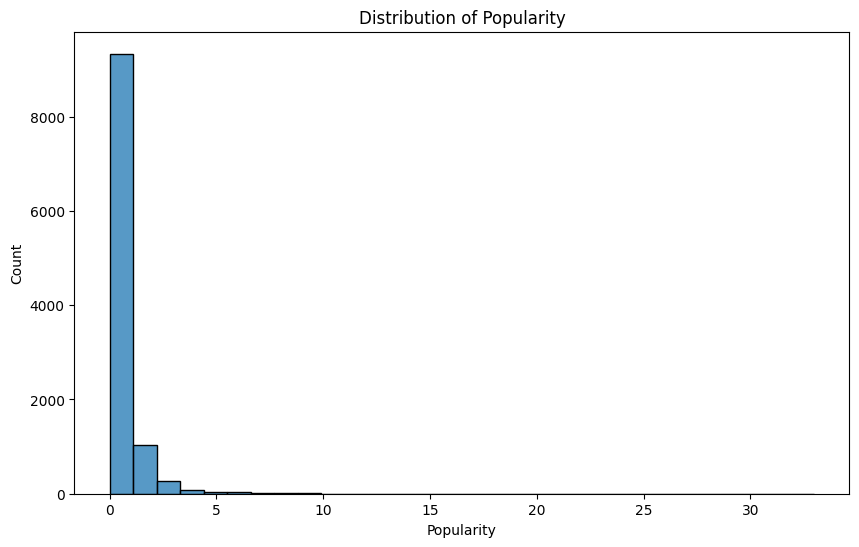

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='popularity', bins=30)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

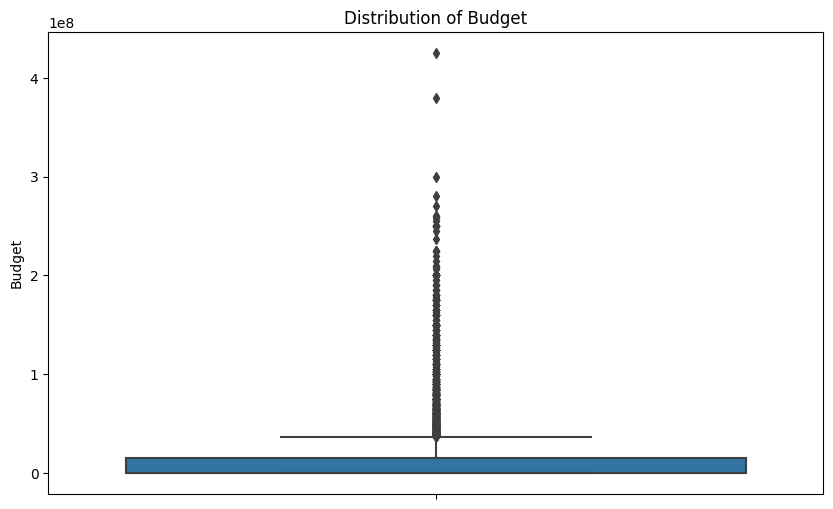

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='budget')
plt.title('Distribution of Budget')
plt.ylabel('Budget')
plt.show()

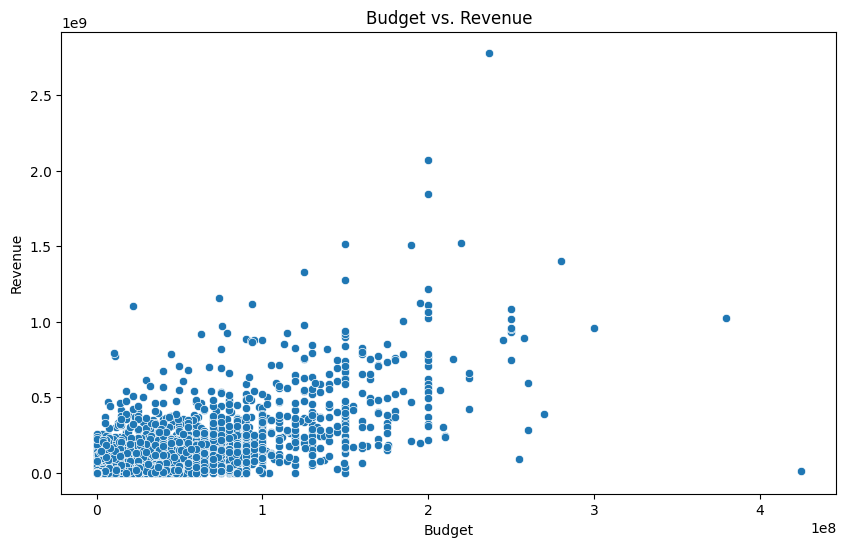

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='budget', y='revenue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Question 

Question 1 : Count of actors
count the total number of actor appearances

In [65]:
num_actor_appearances = data['cast'].str.count('|').sum() + len(data)
print("Number of actor appearances in the dataset: {}".format(num_actor_appearances))

Number of actor appearances in the dataset: 753942


Question #2: Exploring the Movie genres through the years of the dataset

In [66]:
year_set = set()
genre_set = []
genres_and_year = data[["genres", "release_year"]]

# create a set of unique years of movies
production_year = genres_and_year["release_year"]
production_year = production_year.drop_duplicates()
for year in production_year:
    if year not in year_set:
        year_set.add(year)

# create a list of unique genres by parsing all the years
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_set:
                genre_set.append(genre)

# create a dataframe which contains the sum of movies' genre per year
genre_count_per_year_df = pd.DataFrame(index=list(year_set), columns=genre_set)
genre_count_per_year_df[:] = 0

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
                    
    aux_df = pd.DataFrame(genre_dict, index=[year])
    genre_count_per_year_df.loc[year, aux_df.columns] = genre_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]

# most popular genre of movies from year to year
# convert the data type of the DataFrame to float
genre_count_per_year_df = genre_count_per_year_df.astype(float)

# most popular genre of movies from year to year
most_popular_genre_by_year = pd.DataFrame([genre_count_per_year_df.idxmax(axis=1).values,
                                           genre_count_per_year_df.apply(max, axis=1).values],
                                          columns=genre_count_per_year_df.index,
                                          index=["genre", 'counts'])

print(most_popular_genre_by_year)

         1960   1961   1962   1963   1964   1965   1966    1967   1968   1969  \
genre   Drama  Drama  Drama  Drama  Drama  Drama  Drama  Comedy  Drama  Drama   
counts   13.0   16.0   21.0   13.0   20.0   20.0   16.0    17.0   20.0   13.0   

        ...   2006   2007   2008   2009   2010   2011   2012   2013   2014  \
genre   ...  Drama  Drama  Drama  Drama  Drama  Drama  Drama  Drama  Drama   
counts  ...  197.0  195.0  234.0  226.0  211.0  214.0  235.0  256.0  284.0   

         2015  
genre   Drama  
counts  262.0  

[2 rows x 56 columns]


Question3  How many movies based on their genres were produced

In [67]:
temp = genre_count_per_year_df.apply(sum)
temp = temp.sort_values(ascending= False)

print(temp)

Drama              4778.0
Comedy             3791.0
Thriller           2907.0
Action             2379.0
Romance            1711.0
Horror             1637.0
Adventure          1469.0
Crime              1354.0
Family             1230.0
Science Fiction    1224.0
Fantasy             913.0
Mystery             810.0
Animation           697.0
Documentary         519.0
Music               406.0
History             334.0
War                 270.0
Foreign             188.0
TV Movie            167.0
Western             165.0
dtype: float64


Question #4: How much the movie genres changes from year to year

In [68]:
print(genre_count_per_year_df)

      Drama  Horror  Thriller  Action  Adventure  Western  History  Comedy  \
1960   13.0     7.0       6.0     8.0        5.0      6.0      5.0     8.0   
1961   16.0     3.0       0.0     7.0        6.0      3.0      3.0    10.0   
1962   21.0     5.0       7.0     8.0        7.0      3.0      4.0     5.0   
1963   13.0     9.0      10.0     4.0        7.0      2.0      4.0    13.0   
1964   20.0     6.0       9.0     5.0        5.0      1.0      3.0    16.0   
1965   20.0     5.0      11.0     9.0        6.0      4.0      4.0     7.0   
1966   16.0     3.0       8.0    14.0       11.0      7.0      2.0    16.0   
1967   16.0     4.0       5.0     7.0        7.0      2.0      0.0    17.0   
1968   20.0     4.0       5.0     6.0        5.0      1.0      3.0     9.0   
1969   13.0     1.0       3.0    10.0        5.0      7.0      3.0    12.0   
1970   20.0     5.0       5.0    11.0        6.0      8.0      3.0    12.0   
1971   30.0     7.0      17.0    11.0        5.0      5.0      3

Question5: Top Movies based on features


In [69]:
revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = data[["original_title", "revenue_adj"]]
movies_and_budget = data[['original_title','budget_adj']]
movies_and_popularity = data[['original_title','popularity']]
movies_and_votes= data[['original_title','vote_average']]

print("Top Movies based on different features")
print(movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title)

Top Movies based on different features
1386                             Avatar
1329                          Star Wars
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
3          Star Wars: The Force Awakens
8889         E.T. the Extra-Terrestrial
8094                            The Net
10110    One Hundred and One Dalmatians
4361                       The Avengers
Name: original_title, dtype: object


Question6:Top 10 movie with the highest adjusted revenue

In [70]:
print("Top 10 movie with the highest adjusted revenue")
print(movies_and_budget.sort_values(by="budget_adj", ascending=False).head(10).original_title)

Top 10 movie with the highest adjusted revenue
2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
6570                               Superman Returns
5231                                        Titanic
7394                                   Spider-Man 3
1929                                        Tangled
14                          Avengers: Age of Ultron
1389         Harry Potter and the Half-Blood Prince
8089                                     Waterworld
Name: original_title, dtype: object


Question7: Top Movies based on their popularity

In [71]:
print("Top Movies based on their popularity")
print(movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).original_title)

Top Movies based on their popularity
0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object


Question8 Top 10 Movies based on their average vote

In [72]:
print("Top 10 Movies based on their average vote")
print( movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).original_title)

Top 10 Movies based on their average vote
3894                        The Story of Film: An Odyssey
538                                  The Mask You Live In
2269                                          Life Cycles
1200                        Black Mirror: White Christmas
6911                                    Pink Floyd: Pulse
8411                                Queen - Rock Montreal
5830                   Doctor Who: The Time of the Doctor
8221    A Personal Journey with Martin Scorsese Throug...
3224    John Mayer: Where the Light Is Live in Los Ang...
8839                  Dave Chappelle: Killin' Them Softly
Name: original_title, dtype: object


Question9: Average Votes Distribution

In [73]:
print("Average Votes Distribution")
print(data[["vote_average"]])

Average Votes Distribution
       vote_average
0               6.5
1               7.1
2               6.3
3               7.5
4               7.3
...             ...
10861           7.4
10862           5.7
10863           6.5
10864           5.4
10865           1.5

[10852 rows x 1 columns]


Question10 Ratings Distribution by Year

In [74]:
print("Ratings Distribution by Year")
print(data[["release_year", "vote_average"]])

Ratings Distribution by Year
       release_year  vote_average
0              2015           6.5
1              2015           7.1
2              2015           6.3
3              2015           7.5
4              2015           7.3
...             ...           ...
10861          1966           7.4
10862          1966           5.7
10863          1966           6.5
10864          1966           5.4
10865          1966           1.5

[10852 rows x 2 columns]


Question 11: number of movies

In [75]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
data[temp_list] = data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
data.dropna(subset = temp_list, inplace = True)

rows, col = data.shape
print("number of movies")
print(rows-1)

number of movies
3853


Question 12: Movies which had most and least profit

In [76]:
# calculate profit for each movie
data['profit'] = data['revenue'] - data['budget']

# find the movie with the highest profit
max_profit_movie = data.loc[data['profit'].idxmax()]

# find the movie with the lowest profit
min_profit_movie = data.loc[data['profit'].idxmin()]

# print the results
print("Movie with highest profit:")
print("Title: {} \nProfit: ${:,.2f}".format(max_profit_movie['original_title'], max_profit_movie['profit']))
print("\n")
print("Movie with lowest profit:")
print("Title: {} \nProfit: ${:,.2f}".format(min_profit_movie['original_title'], min_profit_movie['profit']))

Movie with highest profit:
Title: Avatar 
Profit: $2,544,505,847.00


Movie with lowest profit:
Title: The Warrior's Way 
Profit: $-413,912,431.00


Question 13 Get Most Genre Has Profit

In [77]:
# calculate profit for each movie
data['profit'] = data['revenue'] - data['budget']

# split genres into separate rows
genres = data['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# merge genres with original data
genres_data = data.drop(columns=['genres']).join(genres)

# group by genre and sum the profits
genre_profits = genres_data.groupby('genre')['profit'].sum()

# find the genre with the highest profit
most_profitable_genre = genre_profits.idxmax()

# print the results
print("Most profitable genre: {}".format(most_profitable_genre))

Most profitable genre: Adventure


Question 14: Least profitable genre

In [78]:
data['profit'] = data['revenue'] - data['budget']

# split genres into separate rows
genres = data['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# merge genres with original data
genres_data = data.drop(columns=['genres']).join(genres)

# group by genre and sum the profits
genre_profits = genres_data.groupby('genre')['profit'].sum()

# find the genre with the lowest profit
least_profitable_genre = genre_profits.idxmin()

# print the results
print("Least profitable genre: {}".format(least_profitable_genre))

Least profitable genre: Foreign


Question 15 Best movie profit for top 5 actors

In [79]:
# calculate profit for each movie
data['profit'] = data['revenue'] - data['budget']

# get the top 5 actors by number of movie appearances
top_actors = data['cast'].str.split('|', expand=True).stack().value_counts().head(5).index.tolist()

# initialize an empty dictionary to store the best movie for each actor
best_movies = {}

# loop over each actor and find their best movie
for actor in top_actors:
    # filter the data to include only movies with the current actor
    actor_movies = data[data['cast'].str.contains(actor)]
    if len(actor_movies) > 0:
        # find the movie with the highest profit for the actor
        best_movie = actor_movies.loc[actor_movies['profit'].idxmax()]
        # store the title of the best movie for the actor in the dictionary
        best_movies[actor] = best_movie['original_title']

# print the results
for actor, movie in best_movies.items():
    print("{}: {}".format(actor, movie))

Robert De Niro: Meet the Fockers
Bruce Willis: The Sixth Sense
Samuel L. Jackson: Star Wars: Episode III - Revenge of the Sith
Nicolas Cage: The Croods
Matt Damon: The Martian


Question 16  Production company with the most movies

In [80]:
# count the number of movies for each production company
company_counts = data['production_companies'].str.split('|', expand=True).stack().value_counts()

# find the company with the most movies
most_movies_company = company_counts.idxmax()

# print the result
print("Production company with the most movies: {}".format(most_movies_company))

Production company with the most movies: Universal Pictures


Question 17 Worst 5 actors by average rating

In [81]:
# group the data by actor and calculate the average rating for each actor
actor_ratings = data.groupby('cast')['vote_average'].mean()

# sort the actors by their average rating (ascending order) and get the 5 worst actors
worst_actors = actor_ratings.sort_values().head(5)

# print the result
print("Worst 5 actors by average rating:")
for actor, rating in worst_actors.items():
    print("- {}: {:.2f}".format(actor, rating))

Worst 5 actors by average rating:
- Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longoria|Christopher Lloyd: 2.20
- Stephen Dorff|Natascha McElhone|Stephen Rea|Udo Kier|Amelia Curtis: 3.30
- Thomas Kretschmann|Asia Argento|Rutger Hauer|Marta Gastini|Unax Ugalde: 3.30
- Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Crista Flanagan|Gary 'G. Thang' Johnson: 3.30
- Kal Penn|Adam Campbell|Jennifer Coolidge|Jayma Mays|Faune A. Chambers: 3.40


Question 18 Least watched genre

In [82]:
# count the number of movies in each genre
genre_counts = data['genres'].str.split('|', expand=True).stack().value_counts()

# sort the genres by their count (ascending order) and get the 5 least watched genres
least_watched_genres = genre_counts.sort_values().head(5)

# print the result
print("Least watched 5 genres:")
for genre, count in least_watched_genres.items():
    print("- {}: {}".format(genre, count))

Least watched 5 genres:
- TV Movie: 1
- Foreign: 13
- Documentary: 35
- Western: 52
- War: 119


Question 19 most rated year

In [83]:
# group the data by release year and count the number of ratings for each year
year_counts = data.groupby('release_year')['vote_count'].sum()

# find the year with the most ratings
most_ratings_year = year_counts.idxmax()

# print the result
print("Year with the most ratings: {}".format(most_ratings_year))

Year with the most ratings: 2013


Question20: the least year rated

In [84]:
# group the data by release year and count the number of ratings for each year
year_counts = data.groupby('release_year')['vote_count'].sum()

# find the year with the least ratings
least_ratings_year = year_counts.idxmin()

# print the result
print("Year with the least ratings: {}".format(least_ratings_year))

Year with the least ratings: 1966


What is the average runtime of movies?

In [85]:
avg_runtime = data['runtime'].mean()
print(f"Average runtime: {avg_runtime:.2f} minutes")

Average runtime: 109.22 minutes


What is the correlation between budget and revenue?

In [89]:
correlation = data['budget'].corr(data['revenue'])
print(f"Correlation between budget and revenue: {correlation:.2f}")

Correlation between budget and revenue: 0.69


 Which director has the highest number of movies?

In [93]:
director_most_movies = data['director'].value_counts().idxmax()
print(f"The director with the most movies: {director_most_movies}")

The director with the most movies: Steven Spielberg
